# 통계

##  1. 1차원 데이터(p.31)

- 평균값(기댓값), 표본분산, 불편분산(ddof=1), 표준편차
- 표본분산은 표본의 평균을 사용해서 분산을 계산한 값으로 분산을 과소 추정하는 경향이 있으며 그 경향을 없애기 위한 것이 불편분산임. 표본분산 보다 조금 큰 값이 된다.
- 표준화 : 평균값이 큰 변수와 작은 변수가 섞여 있으면 다루기 어려우므로 표준화로 데이터를 비교하기 쉽게 한다.
- 최댓값, 최솟값, 중앙값, 사분위수
- 표본분산과 비편향 분산
  - 분산은 표본 분산과 불편분산(unbiased variance)의 두 종류가 존재
  - 표본 분산은 표본에서 계산된 분산이며 모집단에 비해 표본수가 적을 때는 표본 분산이 모분산보다 작아진다.
  - 즉 표본 분산이 모집단 분산에 맞춰서 동일하게 보정한 것을 비편향 분산이라 한다.
  - 통계학에서는 이 비편향분산을 사용하는 경우가 많다.
  - 불편분산은 n대신 n-1로 나누어 구할 수 있다.
  
[표분분산이 분산을 과소 평가하는 이유]

- 호수안에 물고기가 7마리가 있다. 몸길이 {1,2,3,4,5,6,7}, 모평균 4, 샘플링1 3마리{1,2,3} 
  표본평균 2, 샘플링2 {5,6,7} 표본평균 6 
- 이때 분산은 모평균을 모르기 때문에 표본평균과의 거리를 계산하며 분산을 과소평가 하게된다. 
- 표본 분산 보다 조금 더 큰 값이 되도록 보정하기 위하여 N대신 N-1로 나누어 불편분산을 구할 수 있다.

## Box plot 의미 해석

* IQR(Inter Quartile Range): 제 3사분위수 - 제1사분위수
* lower whisker: Q1 - 1.5 x IQR 이내인 값중에서 최솟값
* upper whisker: Q3 + 1.5 x IQR 이내인 값중에서 최댓값
* 이상치: lower whisker, upper whisker를 벗어나는 값

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
import seaborn as sns
from matplotlib import font_manager, rc
from scipy import stats
import warnings 
warnings.filterwarnings('ignore')
from scipy.special import erf
font_path = 'data/malgun.ttf' #malgun 폰트 저장 후 불러오기
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font_name)
plt.rcParams['axes.unicode_minus'] = False  #마이너스 부호 출력 하게끔

In [62]:
df = pd.read_csv('data/ch2_scores_em.csv', index_col = 0)
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


### 과제1. 교재 ~51 pg 코드 문제 풀기

과제2. 20개 원소로 구성되는 배열을 만든 후 평균, 편차 및 편차의 합을 구하기
과제3. 중앙값>평균값인 경우와 중앙값<평균값인 두가지 집합에서 나타나는 가능성있는 특징을 사례로 설명하기
과제4. 4분위를 이용하여 이상치를 구하는 사례를 생성하고 시각화 및 이상치 산출하는 과정을 설명하기
과제5. 표본분산과 불편분산의 차이를 사례를 들어 설명하기

- 인덱스 문자로 변환 

In [63]:
# 영어점수만 출력 (10개까지)
score_df = pd.DataFrame(columns = ['score'], index = pd.Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], name='student'))
score_df['score'] = df['english'][:10].tolist()
score_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


- 평균값 구하기

In [64]:
# 리스트 출력
scores = score_df['score'].tolist()

#파이썬
print('파이썬', sum(scores)/len(scores))

#numpy
print('numpy', np.mean(scores))

#df에서 출력
print('dataframe', score_df.mean())

파이썬 55.0
numpy 55.0
dataframe score    55.0
dtype: float64


- 중앙값

In [65]:
# 정렬
sorted_scores = np.sort(scores)

# 조건 (홀수, 짝수)
n = len(sorted_scores)
# 짝수일때 가운데 숫자 2개의 평균
if n%2 == 0:
    m0 = sorted_scores[n//2-1]
    m1 = sorted_scores[n//2]
    median = (m0+m1)/2
    
else:
    median = sorted_scores[(n+1)//2 -1]
print(median)

# numpy
print(np.median(scores))

#dataframe
score_df.median()

56.5
56.5


score    56.5
dtype: float64

- 최빈값

In [66]:
# dataframe
print(score_df.mode(), '\n')
print(score_df['score'].value_counts())

   score
0     65 

65    2
42    1
69    1
56    1
41    1
57    1
48    1
49    1
58    1
Name: score, dtype: int64


- 분산과 표준편차

In [67]:
# 1. 편차
mean = np.mean(scores)
deviation = scores - mean
print('평균', mean)
print('영어점수 10명의 편차', deviation)
print('편차의 평균', np.mean(deviation), '\n')

#다른 점수
another_score = [50, 60, 58, 54, 51, 56, 57, 53, 52, 59]
another_mean = np.mean(another_score)
another_deviation = another_score - another_mean
print('another 평균', another_mean)
print('another 편차', another_deviation)

# df에 편차 추가
summary_df = score_df.copy()
summary_df['deviation'] = deviation

평균 55.0
영어점수 10명의 편차 [-13.  14.   1. -14.   2.  -7.  10.  -6.  10.   3.]
편차의 평균 0.0 

another 평균 55.0
another 편차 [-5.  5.  3. -1. -4.  1.  2. -2. -3.  4.]


In [68]:
# 평균
summary_df.mean()

score        55.0
deviation     0.0
dtype: float64

In [69]:
# 2. 분산 (표준편차의 제곱)
print(np.mean(deviation**2), '\n')

# var 함수 사용
print(np.var(scores), '\n')

# 표본분산
print('표본분산', score_df.var(ddof=0), '\n')

# 불편분산
print('불편분산', score_df.var())

# df에 편차제곱열 추가
summary_df['s_deviation'] = np.square(deviation)

86.0 

86.0 

표본분산 score    86.0
dtype: float64 

불편분산 score    95.555556
dtype: float64


In [70]:
summary_df.mean()

score          55.0
deviation       0.0
s_deviation    86.0
dtype: float64

C:\Users\admin\Anaconda3\envs\cakd7\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='score', ylabel='Density'>

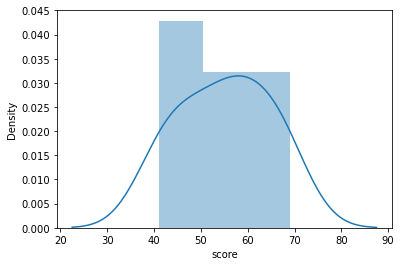

In [71]:
sns.distplot(score_df.score)

- 표준편차

In [72]:
# 제곱근
print('sqrt 함수', np.sqrt(np.var(scores, ddof=0)))
# std 표준편차 
print('std 함수', np.std(scores, ddof=0))

sqrt 함수 9.273618495495704
std 함수 9.273618495495704


- 범위

In [73]:
# 최댓값, 최솟값
np.max(scores) - np.min(scores)

28

In [74]:
# 사분위 범위
s1 = np.percentile(scores, 25)
s3 = np.percentile(scores, 75)
s_IQR = s3 - s1
s_IQR

15.0

In [75]:
# 지표 한번에 출력
summary_df['score'].describe()

count    10.000000
mean     55.000000
std       9.775252
min      41.000000
25%      48.250000
50%      56.500000
75%      63.250000
max      69.000000
Name: score, dtype: float64

### 과제2. 20개 원소로 구성되는 배열을 만든 후 평균, 편차 및 편차의 합을 구하기

In [76]:
np.random.seed(0)
array_2 = np.random.randint(50, 100, size = 20)
array_2

array([94, 97, 50, 53, 53, 89, 59, 69, 71, 86, 73, 56, 74, 74, 62, 51, 88,
       89, 73, 96])

In [77]:
# 평균
print('평균', array_2.mean())
# 편차
print('편차', array_2-array_2.mean())
# 편차의 합
print('편차의 합', (array_2-array_2.mean()).sum())

평균 72.85
편차 [ 21.15  24.15 -22.85 -19.85 -19.85  16.15 -13.85  -3.85  -1.85  13.15
   0.15 -16.85   1.15   1.15 -10.85 -21.85  15.15  16.15   0.15  23.15]
편차의 합 1.1368683772161603e-13


In [78]:
pd.Series(array_2).describe()

count    20.000000
mean     72.850000
std      16.046889
min      50.000000
25%      58.250000
50%      73.000000
75%      88.250000
max      97.000000
dtype: float64

### 과제3. 중앙값>평균값인 경우와 중앙값<평균값인 두가지 집합에서 나타나는 가능성있는 특징을 사례로 설명하기

In [ ]:
mean > 
array_3 = 

C:\Users\admin\Anaconda3\envs\cakd7\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

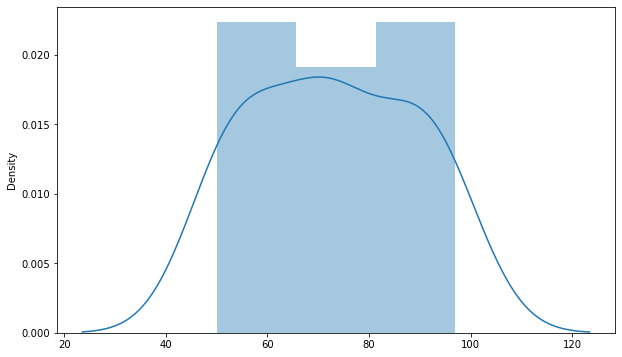

In [86]:
# 중앙값>평균값


# 중앙값<평균값 (array_2)
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
sns.distplot(array_2)

### 과제4. 4분위를 이용하여 이상치를 구하는 사례를 생성하고 시각화 및 이상치 산출하는 과정을 설명하기

- 이상치 => 절대적인 이상치는 아님 (이상치가 될 가능성이 가장 높음)
- upper => 4분위 범위중 3분기에서 IQR을 더해서 구한 값 중 최댓값(이상치)
- lower => 4분위 범위중 1분기에서 IQR을 빼서 구한 값 중 최솟값(이상치)

In [80]:
df_t = pd.DataFrame(pd.Series(array_2), columns = ['score'])
# 이상치로 변경
df_t.iloc[0,0] = 1

In [81]:
# array_2 이용
df_t.describe()

,score
count,20.000000
mean,68.200000
std,21.975106
min,1.000000
25%,55.250000
50%,72.000000
75%,86.500000
max,97.000000


In [83]:
# 4분위 범위
IQR = np.percentile(df_t, 75) - np.percentile(df_t, 25)
IQR

31.25

<AxesSubplot:>

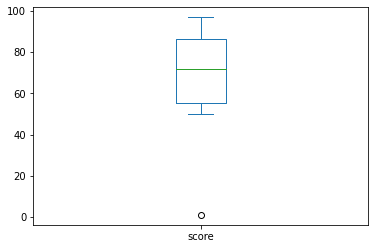

In [84]:
# 이상치 시각화
df_t.plot(kind = 'box')

In [86]:
# 이상치가 아닌 범위
print('이상치 최솟값', np.percentile(df_t, 25) - 1.5*IQR)
print('이상치 최댓값', np.percentile(df_t, 75) + 1.5*IQR)

이상치 최솟값 8.375
이상치 최댓값 133.375


In [89]:
# 이상치
df_t[(df_t['score']<8)|(df_t['score']>134)]

,score
0,1


### 과제5. 표본분산과 불편분산의 차이를 사례를 들어 설명하기

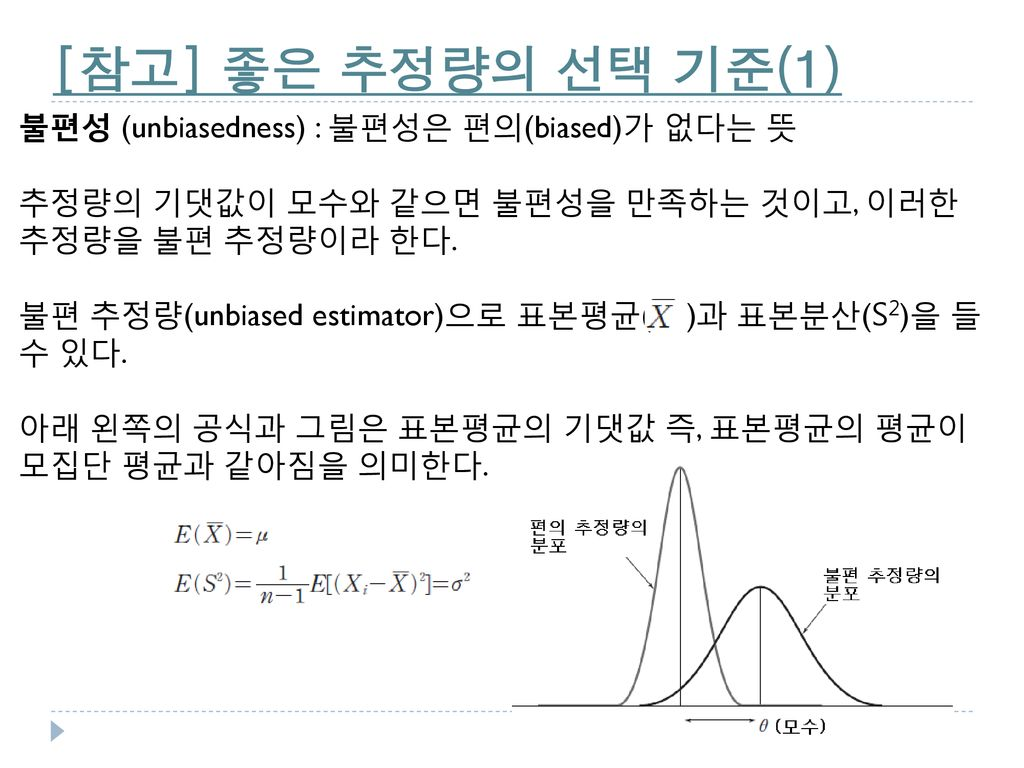

In [46]:
Image('data/불편분산.jpg', )

In [90]:
# df 이용
print('표본집단 표본분산', summary_df['score'].var(ddof=0), '\n')
print('표본집단 불편분산', summary_df['score'].var(), '\n')

# 모분산
print('모집단 분산', df.var(ddof=0), '\n')

표본집단 표본분산 86.0 

표본집단 불편분산 95.55555555555556 

모집단 분산 english        94.1156
mathematics    69.3856
dtype: float64 



In [20]:
df

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76
6,48,60
7,65,81
8,49,66
9,65,78


In [21]:
summary_df

,score,deviation,s_deviation
student,,,
A,42,-13.0,169.0
B,69,14.0,196.0
C,56,1.0,1.0
D,41,-14.0,196.0
E,57,2.0,4.0
F,48,-7.0,49.0
G,65,10.0,100.0
H,49,-6.0,36.0
I,65,10.0,100.0


- 모집단의 크기는 50/ 표본집단의 크기는 10개 -> 이때, 모집단에서 무작위로 뽑아서 비교해보자

In [47]:
# 중간 10개
s_2 = df[10:20]
# 오름차순 정렬
s_3 = df.sort_values(by = 'english')[:30]

In [58]:
# 모분산
print('**********모분산*********')
print('모집단 평균',df.mean(), '\n')
print('모집단 분산', df.var(ddof=0), '\n')

# 표본분산
# s_2
print('**********s_2**********')
print('s_2 평균', s_2['english'].mean())
print('s_2 표준편차', s_2['english']-s_2['english'].mean())
print('s_2 표본분산', s_2['english'].var(ddof=0))
print('s_2 불편분산', s_2['english'].var(), '\n')

# s_3
print('**********s_3**********')
print('s_2 평균', s_3['english'].mean())
print('s_2 표준편차', s_3['english']-s_3['english'].mean())
print('s_3 표본분산', s_3['english'].var(ddof=0))
print('s_3 불편분산', s_3['english'].var(), '\n')

**********모분산*********
모집단 평균 english        58.38
mathematics    78.88
dtype: float64 

모집단 분산 english        94.1156
mathematics    69.3856
dtype: float64 

**********s_2**********
s_2 평균 61.3
s_2 표준편차 student number
11     8.7
12   -14.3
13   -10.3
14     2.7
15     0.7
16     8.7
17     9.7
18     6.7
19    11.7
20   -24.3
Name: english, dtype: float64
s_2 표본분산 133.60999999999999
s_2 불편분산 148.45555555555555 

**********s_3**********
s_2 평균 52.2
s_2 표준편차 student number
20   -15.2
35   -15.2
4    -11.2
1    -10.2
34   -10.2
46    -7.2
29    -5.2
12    -5.2
6     -4.2
8     -3.2
13    -1.2
24    -0.2
33     1.8
32     1.8
30     1.8
40     2.8
45     2.8
48     2.8
37     3.8
3      3.8
43     4.8
42     4.8
26     4.8
25     4.8
5      4.8
10     5.8
28     8.8
23     8.8
39     9.8
38     9.8
Name: english, dtype: float64
s_3 표본분산 49.62666666666668
s_3 불편분산 51.33793103448277 



- 8/23

### 과제1. p.52~83 문제 풀기

### 데이터 정규화

- 표준화 (평균 = 0, 표준편차 =1)

- z = (x - 평균)/표준편차

In [108]:
scores

[42, 69, 56, 41, 57, 48, 65, 49, 65, 58]

In [100]:
z = (scores-np.mean(scores)) / np.std(scores)
z = z.round(1)

In [101]:
print('z의 평균', z.mean().round(1))
print('z의 편차', np.std(z).round(1))

z의 평균 0.0
z의 편차 1.0


C:\Users\admin\Anaconda3\envs\cakd7\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

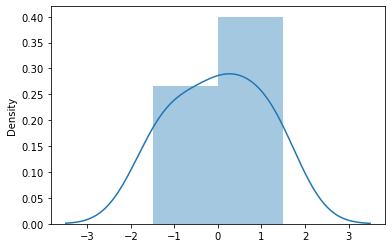

In [102]:
sns.distplot(z)

- 편찻값 (평균 = 50, 표준편차 = 10)

In [103]:
z1 = 50 + 10*(z)
z1

array([36., 65., 51., 35., 52., 42., 61., 44., 61., 53.])

In [104]:
print('z1의 평균', z1.mean().round(1))
print('z1의 편차', np.std(z1).round(1))

z1의 평균 50.0
z1의 편차 10.0


In [106]:
score_df['d_v'] = z1

In [107]:
score_df

,score,d_v
student,,
A,42,36.0
B,69,65.0
C,56,51.0
D,41,35.0
E,57,52.0
F,48,42.0
G,65,61.0
H,49,44.0
I,65,61.0


In [112]:
# d_v로 정렬
score_df.sort_values(by = 'd_v')

,score,d_v
student,,
D,41,35.0
A,42,36.0
F,48,42.0
H,49,44.0
C,56,51.0
E,57,52.0
J,58,53.0
G,65,61.0
I,65,61.0


- 학생 B가 가장 우수한 성적

C:\Users\admin\Anaconda3\envs\cakd7\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

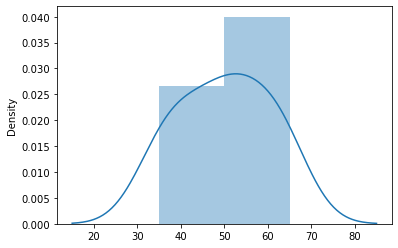

In [109]:
sns.distplot(z1)

- 평균이 50

### 과제2. 
일차원 데이터를 생성하여 다음을 수행하세요.
- 도수분포표를 만들고 히스토그램으로 시각화하기(계급을 변경하여 2개를 작성)
- 상대도수 및 누적상대도수를 도수분포표에 추가하고 히스토그램과 누적상대도수를 시각화하기

- 1차원 데이터 시각화

In [116]:
# df에서 영어점수들만 뽑아오기
e_scores = np.array(df['english'])

# 시리즈로 변환 후 describe 표시
pd.Series(e_scores).describe()

count    50.000000
mean     58.380000
std       9.799813
min      37.000000
25%      54.000000
50%      57.500000
75%      65.000000
max      79.000000
dtype: float64

- 도수분포표 (bins = 계급, range = 최소, 최댓값)

In [119]:
freq, _ = np.histogram(e_scores, bins=10, range=(0,100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64)

- 30-40점 => 2명  40-50점 => 8명 50-60점 => 16명 60-70점 => 18명 70-80점 => 6명

In [150]:
# 점수 범위 리스트 작성 (0~10, 10~20...단위의 리스트 작성)
score_bin = [ (f'{i}~{i+10}') for i in range(0, 100, 10) ]

# 인덱스로 설정
freq_df = pd.DataFrame({'freq':freq}, index = pd.Index(score_bin, name = 'score_bin'))
freq_df

,freq
score_bin,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


- 계급값

In [151]:
# 각구간의 대표(중앙)
class_value = [ (i+(i+10))//2 for i in range(0,100,10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

- 상대도수 (전체 중 차지하는 비율)

In [152]:
rel_freq = freq/freq.sum()

for i in range(len(rel_freq)):
    print(f'{score_bin[i]}구간의 비율 {(rel_freq[i]*100)}%')

0~10구간의 비율 0.0%
10~20구간의 비율 0.0%
20~30구간의 비율 0.0%
30~40구간의 비율 4.0%
40~50구간의 비율 16.0%
50~60구간의 비율 32.0%
60~70구간의 비율 36.0%
70~80구간의 비율 12.0%
80~90구간의 비율 0.0%
90~100구간의 비율 0.0%


- 누적상대도수 (해당 계급까지 상대도수의 합 - 최종 합 = 1)

In [153]:
cum_rel = np.cumsum(rel_freq)
print(cum_rel)

# df에 열추가
freq_df['rel_freq(상대도수)'] = rel_freq
freq_df['cum_freq(누적상대)'] = cum_rel
freq_df

[0.   0.   0.   0.04 0.2  0.52 0.88 1.   1.   1.  ]


,freq,rel_freq(상대도수),cum_freq(누적상대)
score_bin,,,
0~10,0,0.00,0.00
10~20,0,0.00,0.00
20~30,0,0.00,0.00
30~40,2,0.04,0.04
40~50,8,0.16,0.20
50~60,16,0.32,0.52
60~70,18,0.36,0.88
70~80,6,0.12,1.00
80~90,0,0.00,1.00


In [162]:
freq_df.freq.idxmax()

'60~70'

In [165]:
# 최빈값
print('최빈값 점수', freq_df.freq.idxmax())
freq_df.loc[freq_df.freq.idxmax(), :]

최빈값 점수 60~70


freq              18.00
rel_freq(상대도수)     0.36
cum_freq(누적상대)     0.88
Name: 60~70, dtype: float64

- 히스토그램

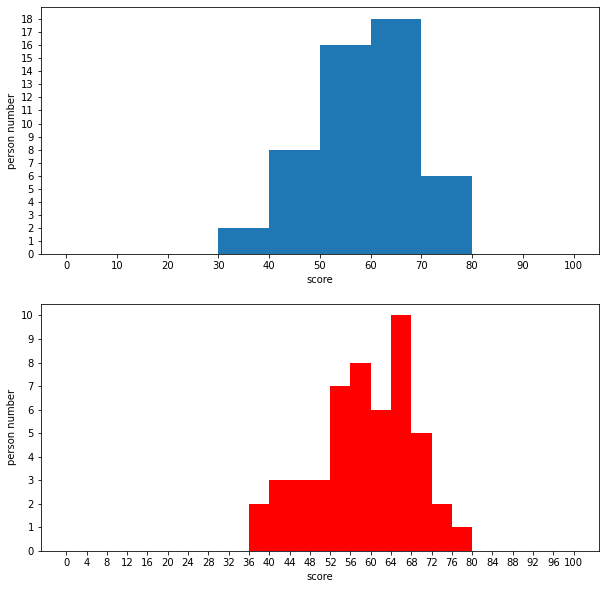

In [171]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(211)

freq, _, _ = ax.hist(e_scores, bins = 10, range= (0, 100))
ax.set_xlabel('score')
ax.set_ylabel('person number')
ax.set_xticks(np.linspace(0,100,10+1))
ax.set_yticks(np.arange(0, freq.max()+1))

# 계급수 늘려서 출력
ax1 = fig.add_subplot(212)

freq, _, _ = ax1.hist(e_scores, bins = 25, range= (0, 100), color='red')
ax1.set_xlabel('score')
ax1.set_ylabel('person number')
ax1.set_xticks(np.linspace(0,100,25+1))
ax1.set_yticks(np.arange(0, freq.max()+1))

- 상대도수의 히스토그램을 누적상대도수의 꺾은선 그래프로 그리기

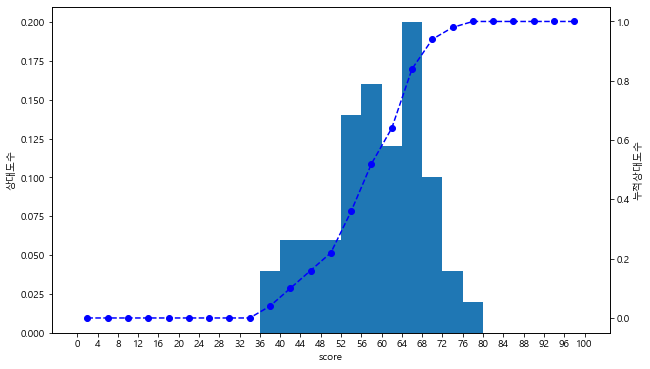

In [175]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
# 꺾은 선 그래프
ax1 = ax.twinx()

# 상대도수를 데이터의 수로 나누기(hist 높이로 지정)
weights = np.ones_like(e_scores) / len(e_scores)
rel_freq, _, _ = ax.hist(e_scores, bins = 25, range= (0, 100), weights=weights)

# 누적상대도수
cum_rel_freq = np.cumsum(rel_freq)

# 꺾은선 그래프 범위
class_value = [(i+(i+4))//2 for i in range(0, 100, 4)]
ax1.plot(class_value, cum_rel_freq, ls = "--", marker = 'o', color = 'blue')
ax.set_xlabel('score')
ax.set_ylabel('상대도수')
ax1.set_ylabel('누적상대도수')

ax.set_xticks(np.linspace(0, 100, 25+1))

plt.show()

- boxplot

<AxesSubplot:>

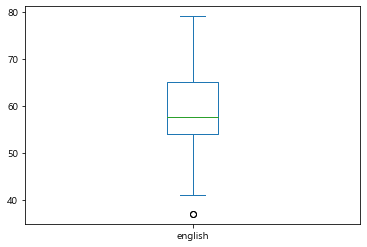

In [178]:
df.english.plot(kind = 'box')

In [181]:
# 이상치 
q1 = df.english.describe()['25%']
q3 = df.english.describe()['75%']
IQR = q3-q1
l_q = q1 - 1.5*IQR
h_q = q3 + 1.5*IQR

result = df.english[(df.english<l_q)|(df.english>h_q)]
print('이상치', result)

이상치 student number
20    37
35    37
Name: english, dtype: int64


df의 영어점수 중 박스플럿을 보았을 때 40 이하에 이상치 존재 
lower whisker을 구하였을 때 37점이 이상치 (2명)

## 2. 2차원데이터

In [182]:
e_score = np.array(df['english'])[:10]
ma_score = np.array(df['mathematics'])[:10]
score_df = pd.DataFrame({'english': e_score, 'math': ma_score}, index = pd.Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], name='student'))
score_df

,english,math
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


- 공분산 (분산에 가까운 지표)
- 공분산 행렬 [분산, 공분산]

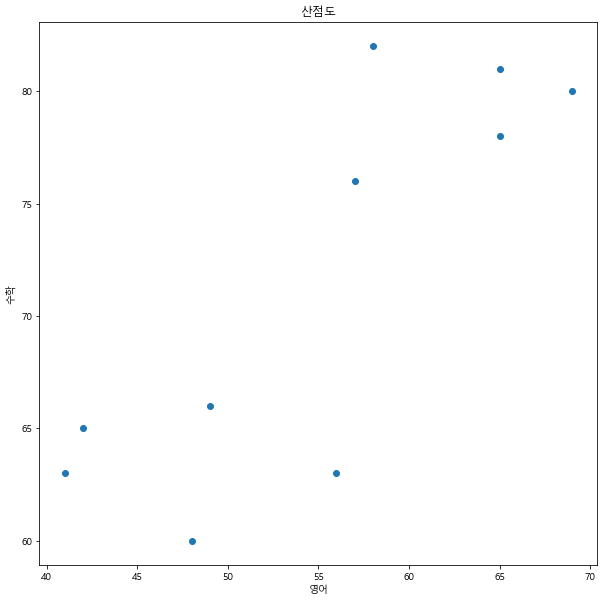

student
A     83.2
B    120.4
C     -8.4
D    117.6
E      9.2
F     79.8
G     96.0
H     32.4
I     66.0
J     31.8
Name: deviations, dtype: float64

In [198]:
# 산점도 먼저 출력
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

ax.set_title('산점도')
ax.scatter(e_score, ma_score)
ax.set_xlabel('영어')
ax.set_ylabel('수학')
plt.show()

# 공분산
sum_df = score_df.copy()
# 영어편차
sum_df['english_deviation'] = sum_df['english'] - sum_df['english'].mean()
# 수학편차
sum_df['math_deviation'] = sum_df['math'] - sum_df['math'].mean()
# 공분산
sum_df['deviations'] = sum_df['english_deviation']*sum_df['math_deviation']
sum_df['deviations']

두 과목은 양의 상관관계

In [194]:
# cov 함수로 구하기
cov_mat = np.cov(e_score, ma_score, ddof=0)
print('표준공분산행렬', cov_mat, '\n')
cov_matt = np.cov(e_score, ma_score)
print('불편공분산행렬', cov_matt, '\n')

# 모분산
cov_maty = np.cov(df.english, df.mathematics)
print('모집단 공분산행렬', cov_maty, '\n')

표준공분산행렬 [[86.   62.8 ]
 [62.8  68.44]] 

불편공분산행렬 [[95.55555556 69.77777778]
 [69.77777778 76.04444444]] 

모집단 공분산행렬 [[96.03632653 59.67918367]
 [59.67918367 70.80163265]] 



- 상관계수

In [197]:
# 계산식 (공분산행렬에서 공분산/x의 표준편차*y의 표준편차)
print('계산식', (np.cov(e_score, ma_score, ddof=0)[0,1] / (np.std(e_score)*np.std(ma_score))).round(2))
# 함수사용
print('corrcoef - 상관행렬', np.corrcoef(e_score, ma_score))
print('corr - 데이터프레임에 사용', score_df.corr())

계산식 0.82
corrcoef - 상관행렬 [[1.         0.81856923]
 [0.81856923 1.        ]]
corr - 데이터프레임에 사용           english      math
english  1.000000  0.818569
math     0.818569  1.000000


- 회귀직선 (np.polyfit, np.poly1d함수 사용)

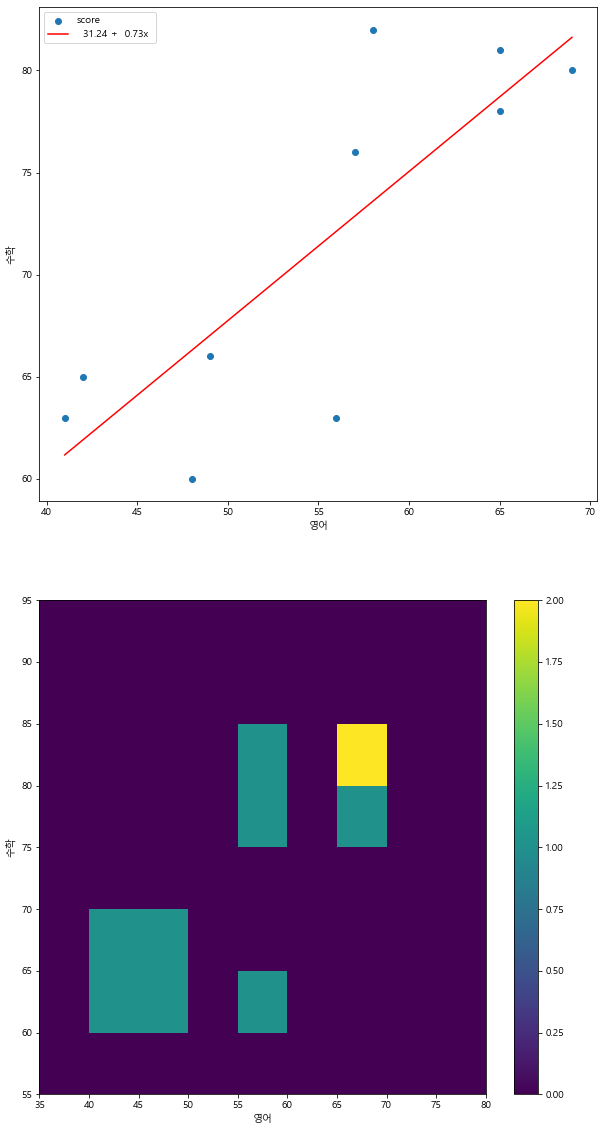

In [209]:
# 계수 구하기 (b0, b1)
pl_fit = np.polyfit(e_score, ma_score, 1)

# 두계수의 합 반환
pl_1d = np.poly1d(pl_fit)

# x좌표 생성(영어점수의 최소, 최댓값)
xs = np.linspace(e_score.min(), e_score.max())
# y좌표 생성
ys = pl_1d(xs)

fig = plt.figure(figsize = (10, 20))
ax = fig.add_subplot(211)
# 산점도
ax.scatter(e_score, ma_score, label='score')

# 회귀직선
ax.plot(xs, ys, color = 'red', label = f' {pl_fit[1]: .2f} + {pl_fit[0]: .2f}x ' )
ax.set_xlabel('영어')
ax.set_ylabel('수학')

# 범례 
ax.legend(loc = 'upper left')

# 히트맵 
ax1 = fig.add_subplot(212)
# range (박스안 그래프 영어범위, 수학 범위)
c = ax1.hist2d(e_score, ma_score, bins = [9, 8], range = [(35, 80), (55, 95)])

ax1.set_xlabel('영어')
ax1.set_ylabel('수학')
ax1.set_xticks(c[1])
ax1.set_yticks(c[2])

# 컬러바
fig.colorbar(c[3], ax=ax1)
plt.show()

### 과제 3

이차원 데이터를 생성하여 다음을 수행하세요.(데이터 수 각각 1000개 이상)

공분산 및 상관계수를 구하세요.
이차원 데이터를 산점도, 히트맵으로 시각화한 후 인사이트를 기술하세요

In [243]:
# 2차원 데이터 만들기 (물가와 소득 차이 price = 1,000~5,000 사이 500명/ income = 100,000~500,000원 사이 500명 & 4,000~10,000원 사이/ 300,000~800,000원 사이)
price1 = np.random.randint(1000, 5000, size = 500)
p_1 = pd.Series(price1)
income1 = np.random.randint(100, 500, size = 500)
i_1 = pd.Series(income1)

df1 = pd.DataFrame({'물가' : p_1, '소득' : i_1})
df1['지역'] = 'A'

price2 = np.random.randint(4000, 10000, size = 500)
p_2 = pd.Series(price2)
income2 = np.random.randint(300, 800, size = 500)
i_2 = pd.Series(income2)

df2 = pd.DataFrame({'물가' : p_2, '소득' : i_2})
df2['지역'] = 'B'

t_df = pd.concat([df1, df2])
t_df.reset_index(inplace=True)
total_df = t_df[['지역', '물가', '소득']]
total_df

,지역,물가,소득
0,A,3405,472
1,A,4646,172
2,A,3224,294
3,A,4874,219
4,A,1229,342
...,...,...,...
995,B,5208,345
996,B,6224,673
997,B,7835,549
998,B,6442,718


소득은 천단위

In [ ]:
공분산 및 상관계수를 구하세요. 이차원 데이터를 산점도, 히트맵으로 시각화한 후 인사이트를 기술하세요

- 8/25

### 1차원 이산형 확률변수
기댓값 => {(어떤 변수)*(그 변수가 나올 확률)}의 합 ex. A 고등학교의 1반에서 중간고사 점수 => 그 반에서 한명을 무작위로 뽑았을 때 그 학생의 점수의 기댓값

In [2]:
# 소숫점 3번째 까지
%precision 3

'%.3f'

In [3]:
# 1차원
x_set = np.array([1,2,3,4,5,6])
# 불공정 주사위 함수 생성(숫자가 클 수록 나올 확률이 높은 주사위)
def f(x):
    if x in x_set:
        return x/21
    else:
        return 0

In [4]:
# 확률을 구해줌
X = [x_set, f]
prob = np.array([f(x_k) for x_k in x_set])
print(prob, '\n')

# 변수와 각 변수의 확률을 묶어줌
print('딕셔너리로 묶어주기')
dict(zip(x_set, prob))

[0.048 0.095 0.143 0.19  0.238 0.286] 

딕셔너리로 묶어주기


{1: 0.048, 2: 0.095, 3: 0.143, 4: 0.190, 5: 0.238, 6: 0.286}

Text(0.5, 1.0, 'Bar Graph')

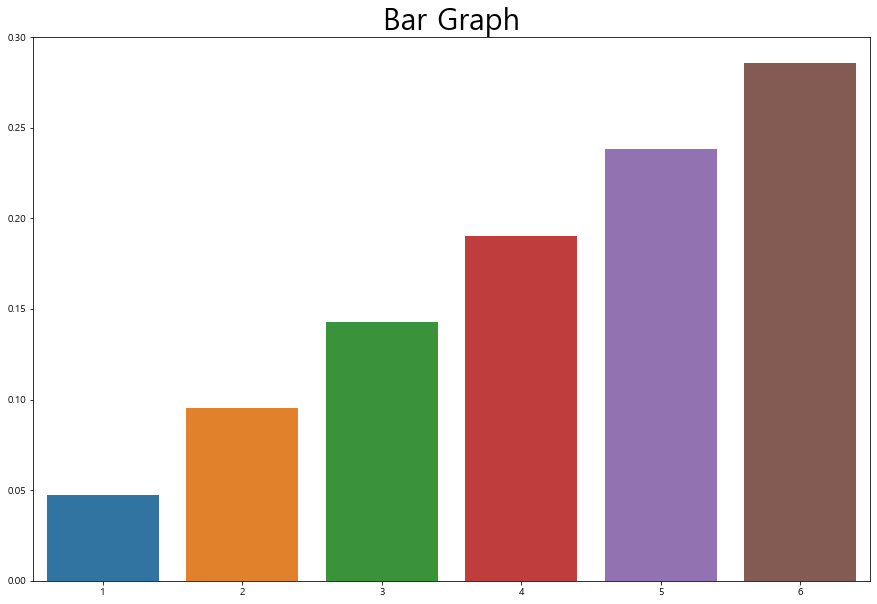

In [5]:
import seaborn as sns
plt.figure(figsize = (15, 10))
sns.barplot(x_set, prob)
plt.title('Bar Graph', fontsize = 30)

- 불공정한 주사위 => 숫자가 커질 수록 그 변수가 나올 확률이 높음

In [6]:
np.sum(prob)

1.000

In [7]:
# 누적분포함수
def F(x):
    return np.sum([f(x_k) for x_k in x_set if x_k <= x])
F(3)

0.286

In [8]:
# 확률변수의 변환 : 확률변수 x에 2를 곱하고 3을 더한 <2x + 3>도 확률변수가 된다.
y_set = np.array([2*x_k + 3 for x_k in x_set])
prob = np.array([f(x_k) for x_k in x_set])
x_dict = dict(zip(y_set, prob))
x_dict

{5: 0.048, 7: 0.095, 9: 0.143, 11: 0.190, 13: 0.238, 15: 0.286}

In [9]:
# 1차원 이산형 확률변수의 지표

print('기본 데이터의 기댓값:', np.sum([x_k * f(x_k) for x_k in x_set]))

기본 데이터의 기댓값: 4.333333333333333


In [10]:
# 동일한 확률로 랜덤하게 나옴
s1 = np.random.choice(x_set, int(10))
print(s1)
print('공정한 주사위의 기댓값:', np.mean(s1))

[3 2 4 6 2 3 6 2 2 2]
공정한 주사위의 기댓값: 3.2


In [11]:
# 불공정한 확률로 랜덤하게 나옴
s2 = np.random.choice(x_set, int(10), p = prob)
print(s2)
print('불공정한 주사위의 기댓값:', np.mean(s2))

[3 6 6 4 2 3 6 6 3 6]
불공정한 주사위의 기댓값: 4.5


- 여기서 s2는 확률변수가 클수록 확률이 높아 s2 기댓값이 s1의 기댓값보다 큼
- 무제한 실행하여 불공정한 확률을 공정하게끔 바꿔줌

In [12]:
# 확률변수의 기댓값은 확률변수를 무제한 시행하여 얻은 실현값의 평균
sample = np.random.choice(x_set, int(1e6),p=prob)
# sample = np.random.choice(x_set, int(1e6))
np.mean(sample)

4.334

In [13]:
# 일반화
def E(X, g=lambda x: x):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])
E(X)

4.333

In [14]:
E(X, g=lambda x: 2*x+3)

11.667

In [15]:
# 기대값의 선형성
2*E(X) +3

11.667

In [16]:
# 분산
mean = E(X)
np.sum([(x_k - mean)**2*f(x_k) for x_k in x_set])

2.222

In [17]:
def V(x, g=lambda x: x):
    x_set, f = x
    mean = E(X, g)
    return np.sum([(g(x_k) - mean)**2*f(x_k) for x_k in x_set])
V(X)

2.222

In [19]:
V(X, lambda x: 2*x +3)

8.889

In [20]:
2**2*V(X)

8.889

- 과제 0825_1
  - p114~ p142 예제를 모두 풀어보세요.

- 과제 0825_2
  - 1차원 이산형 확률변수의 변환 사례를 생성하여 기댓값의 선형성과 분산의 공식을 입증하기

In [38]:
# 사례 생성(로또)
# 10개의 뽑기 중 1등,2등,3등, 4등의 구성 개수(1개, 2개, 3개, 4개=> 총 10개)

# 원래 data 생성 (1등, 2등...이 나올 확률)
st = np.array([1,2,3,4])

# 확률 넣기
def f(x):
    if x in st:
        return x/10
    else:
        return
prob = np.array([f(x) for x in st])
# 데이터 프레임 생성
rotto = pd.DataFrame({'등수':st, 'p': prob})
print(rotto, '\n')
# 기댓값 (변수 * 변수확률)
mean = np.sum([f(x)*x for x in st])
print('이 로또를 뽑았을 때 기댓값:', mean)
# 분산
v = np.sum([(x-mean)**2*f(x) for x in st])
print('분산', v)
rotto

   등수    p
0   1  0.1
1   2  0.2
2   3  0.3
3   4  0.4 

이 로또를 뽑았을 때 기댓값: 3.0
분산 1.0


,등수,p
0,1,0.1
1,2,0.2
2,3,0.3
3,4,0.4


In [39]:
# 변환 전(상금 넣기)
price = np.array([1000, 200, 50, 0])
# 딕셔너리
dic_p = dict(zip(st, price))
# 확률은 그대로
rotto_price = pd.DataFrame({'상금': price, 'p': prob}, index=pd.Index(st, name='등수'))
print(rotto_price, '\n')
# 기댓값
mean1 = np.sum([f(x)*dic_p[x] for x in st])
print(f'변환 전 기댓값: {mean1}원')
# 분산
v1 = np.sum([(dic_p[x]-mean1)**2*f(x) for x in st])
print('변환 전의 분산:', v1)
rotto_price

      상금    p
등수           
1   1000  0.1
2    200  0.2
3     50  0.3
4      0  0.4 

변환 전 기댓값: 155.0원
변환 전의 분산: 84725.0


,상금,p
등수,,
1,1000,0.1
2,200,0.2
3,50,0.3
4,0,0.4


In [24]:
# 변환 후 
# 사례 1(로또 참여비 낼 때-참여비: 50(만)원)
# 얻는 이익(상금 - 참여비)
print('=====================사례1=======================', '\n')
rotto_price['이익'] = rotto_price['상금']-50
profit = dict(zip(st, rotto_price['이익'].tolist()))
print('이익', profit, '\n')
print(rotto_price, '\n')
print('<기댓값과 분산>', '\n')
# 기댓값
mean2 = np.sum([f(x)*profit[x] for x in st])
print(f'사례1 기댓값 {mean2}원')
# 분산
v2 = np.sum([(profit[x]-mean2)**2*f(x) for x in st])
print(f'사례1 분산 {v2}')

# 사례 2(상금 *2배)
print()
print('=====================사례2=======================', '\n')
rotto_2 = rotto_price.copy()
rotto_2['상금'] = rotto_2['상금']*2
price = dict(zip(st, rotto_2['상금'].tolist()))
print('상금', price, '\n')
print(rotto_2, '\n')
print('<기댓값과 분산>', '\n')
# 기댓값
mean3 = np.sum([f(x)*price[x] for x in st])
print(f'사례2 기댓값 {mean3}원')
# 분산
v3 = np.sum([(price[x]-mean3)**2*f(x) for x in st])
print(f'사례2 분산 {v3}')

# 사례 3(상금*2배, 참가비 50(만)원)
print()
print('=====================사례3=======================', '\n')
rotto_2['이익'] = rotto_2['상금']-50
profit2 = dict(zip(st, rotto_2['이익'].tolist()))
print('이익', profit2, '\n')
print(rotto_2, '\n')
print('<기댓값과 분산>', '\n')
# 기댓값
mean4 = np.sum([f(x)*profit2[x] for x in st])
print(f'사례3 기댓값 {mean4}원')
# 분산
v4 = np.sum([(profit2[x]-mean4)**2*f(x) for x in st])
print(f'사례3 분산 {v4}')

=====================사례1======================= 

이익 {1: 950, 2: 150, 3: 0, 4: -50} 

      상금    p   이익
등수                
1   1000  0.1  950
2    200  0.2  150
3     50  0.3    0
4      0  0.4  -50 

<기댓값과 분산> 

사례1 기댓값 105.0원
사례1 분산 84725.0

=====================사례2======================= 

상금 {1: 2000, 2: 400, 3: 100, 4: 0} 

      상금    p   이익
등수                
1   2000  0.1  950
2    400  0.2  150
3    100  0.3    0
4      0  0.4  -50 

<기댓값과 분산> 

사례2 기댓값 310.0원
사례2 분산 338900.0

=====================사례3======================= 

이익 {1: 1950, 2: 350, 3: 50, 4: -50} 

      상금    p    이익
등수                 
1   2000  0.1  1950
2    400  0.2   350
3    100  0.3    50
4      0  0.4   -50 

<기댓값과 분산> 

사례3 기댓값 260.0원
사례3 분산 338900.0


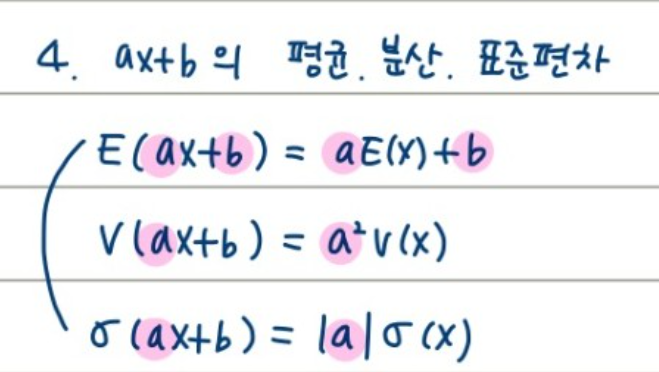

In [28]:
Image('data/평균.png')

In [25]:
# 기댓값의 선형성과 분산 증명하기
# 공식: E(x+a) = a + E(x) / V(x+a) = V(x) | E(x*a) = a*E(x) / V(x*a) = V(x) | E(a*x+b) = a*E(x)+b / V(a*x+b) = a^2*V(x)
# 변형 전 기댓값과 분산
E = mean1
V = v1

# 사례 1 기댓값과 분산
# 변수 - b 
E1 = mean2
V1 = v2

# 사례 2 기댓값과 분산
# 변수 * a
E2 = mean3
V2 = v3

# 사례 3 기댓값과 분산
# 변수*a - b
E3 = mean4
V3 = v4

# 한번에 추출하기
print(f'변형 전 기댓값 = {E}, 분산 = {V}')

li_e = [E1, E2, E3]
li_v = [V1, V2, V3]
a_li = [1, 2, 2]
b_li = [-50, 0, -50]
# 사례1~4 (직접 계산)
for i in range(3):
    print(f'사례{i+1}')
    print(f'직접 계산>> 기댓값 = {li_e[i]}원, 분산 = {li_v[i]}')
    print(f'위식 대입>> 기댓값 = {a_li[i]*E+b_li[i]}원, 분산 = {V*(a_li[i])**2}')

변형 전 기댓값 = 155.0, 분산 = 84725.0
사례1
직접 계산>> 기댓값 = 105.0원, 분산 = 84725.0
위식 대입>> 기댓값 = 105.0원, 분산 = 84725.0
사례2
직접 계산>> 기댓값 = 310.0원, 분산 = 338900.0
위식 대입>> 기댓값 = 310.0원, 분산 = 338900.0
사례3
직접 계산>> 기댓값 = 260.0원, 분산 = 338900.0
위식 대입>> 기댓값 = 260.0원, 분산 = 338900.0


In [26]:
rotto_price['상금'].tolist()

[1000, 200, 50, 0]

- 과제 0825_3
  - 2차원 이산형 확률변수의 변환 사례를 생성하여 기댓값의 선형성, 분산과 공분산 공식을 입증하세요.

In [29]:
A = rotto_price
B = rotto_price
print(A)
print(B)

      상금    p   이익
등수                
1   1000  0.1  950
2    200  0.2  150
3     50  0.3    0
4      0  0.4  -50
      상금    p   이익
등수                
1   1000  0.1  950
2    200  0.2  150
3     50  0.3    0
4      0  0.4  -50


In [37]:
# 2차원 변수 (A, B가 동시에 로또를 뽑고 당첨될 확률)
# 경우의 수=> (X = A+B의 등수 2지역에서 뽑을 때 독립적)

total = pd.DataFrame(columns = [2, 3, 4, 5, 6, 7, 8], index = pd.Index([1,2,3,4], name='A'))
for i in rotto_price.index.tolist():
    for j in rotto_price.index.tolist():
        total.loc[i, i+j] = rotto_price.loc[i, 'p']*rotto_price.loc[j, 'p']
total

,2,3,4,5,6,7,8
A,,,,,,,
1,0.01,0.02,0.03,0.04,NaN,NaN,NaN
2,NaN,0.02,0.04,0.06,0.08,NaN,NaN
3,NaN,NaN,0.03,0.06,0.09,0.12,NaN
4,NaN,NaN,NaN,0.04,0.08,0.12,0.16


In [40]:
x_set = np.arange(1, 5)
y_set = np.arange(2, 9)

def f_XY(x, y):
    if 1<= x <= 4 and 1<= y-x <= 4: 
        return rotto_price.loc[x, 'p']*rotto_price.loc[y-x, 'p']/100
    else:
        return 0

In [41]:
XY = [x_set, y_set, f_XY]
XY

[array([1, 2, 3, 4]),
 array([2, 3, 4, 5, 6, 7, 8]),
 <function __main__.f_XY(x, y)>]

In [42]:
prob1 = np.array([[f_XY(x_i, y_j) for y_j in y_set]for x_i in x_set])
prob1

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.001, 0.001, 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.001, 0.001, 0.001, 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.001, 0.001, 0.002]])

## 3. 이산형 확률분포
- 베르누이 분포
- 이항분포
- 기하분포
- 포아송 분포

In [123]:
# 기댓값과 분산 리턴
linestyles = ['-', '--', ':', '-']

def E(X, g=lambda x: x):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

def V(X, g=lambda x: x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k)-mean)**2 * f(x_k) for x_k in x_set])

def check_prob(X): # 확률변수를 인수로 가지며 기댓값과 분산 계산 결과를 반환
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    # assert 조건, '에러메세지' => 조건을 만족하면 그대로 진행, 아니면 오류메세지 뜨기
    assert np.all(prob >= 0), 'minus probability'
    prob_sum = np.round(np.sum(prob), 6)
    assert prob_sum == 1, f'sum of probability{prob_sum}'
    print(f'expected value {E(X):.4}')
    print(f'variance {(V(X)):.4}')
    
# 그래프그리는 함수
def plot_prob(X): # 확률변수를 인수로 가지며 그 확률변수의 확률함수와 기댓값을 그리기 위한 함수
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    
    fig = plt.figure(figsize=(6, 4))
    ax = fig.add_subplot(111)
    ax.bar(x_set, prob, label='prob', color='yellow')
    # 평균 선 그리기(0과 1사이)
    ax.vlines(E(X), 0, 1, label='mean', color="red")
    ax.set_xticks(np.append(x_set, E(X)))
    ax.set_ylim(0, prob.max()*1.2)
    ax.legend()
    
    plt.show()

### 1) 베르누이 분포
- 확률변수가 취할 수 있는 값은 A(0)와 B(1)밖에 없는 분포 (동전 뒤짚기)
- n이 나올 확률 :  p, 1-n이 나올 확률 : 1-p
- P(X) = (p^n) * (1-p)^(1-n) 

In [89]:
def Bern(p):
    x_set = np.array([0,1])
    def f(x):
        if x in x_set:
            return p**x*(1-p)**(1-x)
        else:
            return 0
    return x_set, f

In [90]:
# 확률이 p 
p = 0.3
X = Bern(0.3)
check_prob(X)

expected value 0.3
variance 0.21


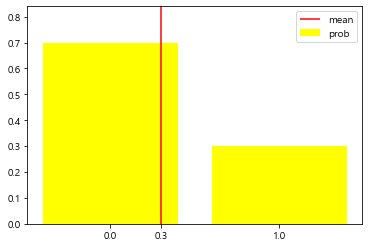

In [91]:
plot_prob(X)

In [96]:
# scipy.stats 함수 이용=> bernoulli 함수(베르누이 분포를 따르는 확률변수 생성)
rv = stats.bernoulli(p)
# 확률변수에 대한 확률 반환
print('pmf=> 확률변수에대한 확률')
print('pmf', rv.pmf(0), rv.pmf(1))
## 다른방법(배열 형식으로 출력)
print('pmf', rv.pmf([0,1]))

# 누적밀도함수 cdf 사용
print('cdf=> 확률변수에대한 누적밀도함수')
print('cdf', rv.cdf([0,1]))
# 기댓값 분산
print('기댓값', rv.mean())
print('분산', rv.var())

pmf=> 확률변수에대한 확률
pmf 0.7 0.3
pmf [0.7 0.3]
cdf=> 확률변수에대한 누적밀도함수
cdf [0.7 1. ]
기댓값 0.3
분산 0.21


### 2) 이항분포
성공 확률이 p인 베르누이 시행을 n번 했을 때의 성공 횟수가 따르는 분포  
f(x) = $_{n}\mathrm{C}_{x}p^x(1-p)^{n-x}$ $(x \in \{0,1,..,n\}$)
       
       0                     (otherwise)

In [97]:
from scipy.special import comb
def Bin(n,p):
    # n 번까지 실행이므로 +1
    x_set = np.arange(n+1)
    def f(x):
        if x in x_set:
            # comb(a, b) = aCb
            return comb(n,x)*p**x*(1-p)**(n-x)
        else:
            return 0
    return x_set, f

In [98]:
n = 10
p = 0.3
X = Bin(n,p)

In [99]:
check_prob(X)

expected value 3.0
variance 2.1


- 과제 0826_2
  - p.156-158 코드문제 풀기

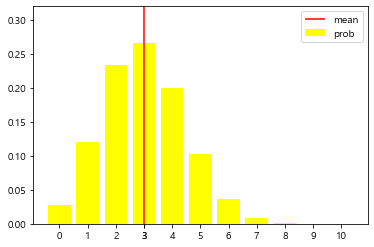

In [102]:
plot_prob(X)

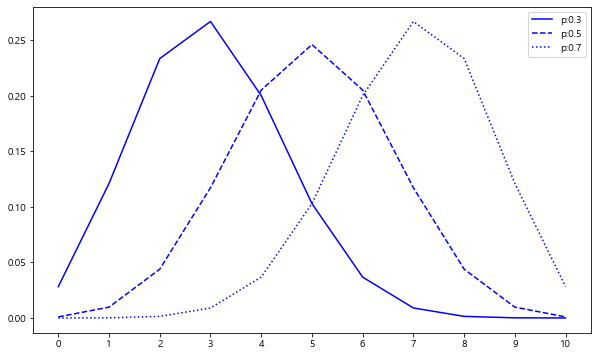

In [105]:
# scipy.stats 의 binom 함수 사용 => 이항분포의 확률변수 
# 확률p를 변환(0.3, 0.5, 0.7)

fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111)
x_set = np.arange(n+1)
for p, ls in zip([0.3, 0.5, 0.7], linestyles):
    rv = stats.binom(n, p)
    ax.plot(x_set, rv.pmf(x_set), label = f'p:{p}', ls=ls, color = 'blue')
ax.set_xticks(x_set)
ax.legend()
plt.show()

- p가 커질수록 정상이 되는 값이 커짐
- p가 0.5 일때, 좌우대칭/ 0.3, 0.7이 대칭 관계

### 3) 기하분포
- 베르누이 시행에서 처음 성공할 때까지 반복한 시행 횟수가 따르는 분포
- 기하분포의 파라미터는 베르누이 시행의 성공 확률 파라미터 p가 되며 파라미터 p의 기하분포를 Ge(p)로 표기  

f(x) = $(1-p)^{x-1}p$ $(x \in \{0,1,2,3,..\})$

       0              (otherwise) 
       
- 기하분포의 기댓값과 분산 : E(X) = 1/p, V(X) = (1-p)/$p^2$


In [109]:
# 성공했을 때 횟수가 x/ 성공한 횟수는 1, 실패한 횟수는 x-1
def Ge(p):
    x_set = np.arange(1, 30) # 임의로 30까지만 지정
    def f(x):
        if x in x_set:
            return p*(1-p)**(x-1)
        else:
            return 0
    return x_set, f

In [110]:
p = 0.5
X = Ge(p)

In [111]:
check_prob(X)

expected value 2.0
variance 2.0


- 과제_0826_3
  - p.162-163코드문제 풀기

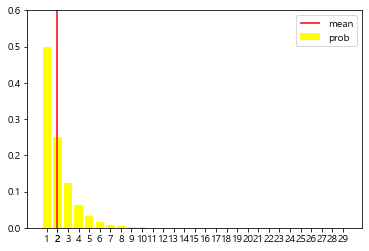

In [112]:
plot_prob(X)

- 횟수가 1번째에 성공할 확률이 가장 높음

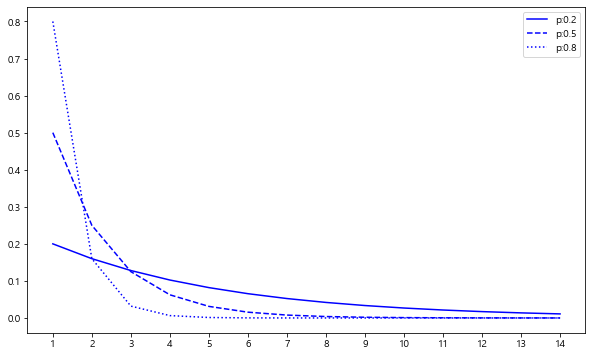

In [114]:
# scipy.stats의 geom 함수 사용 (기하분포 생성)
# p 값 0.2, 0.5, 0.8 로 변경

fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111)

# 범위 14까지만 주기
x_set = np.arange(1, 15)
for p, ls in zip([0.2, 0.5, 0.8], linestyles):
    rv = stats.geom(p)
    ax.plot(x_set, rv.pmf(x_set), label = f'p:{p}', ls=ls, color='blue')
ax.set_xticks(x_set)
ax.legend()

- p와 상관없이 값이 커질 수록 확률이 감소 (성공할 확률이 크면 처음 부분에 성공할 확률 커짐)

### 3) 포아송 분포
- 임의의 사건이 단위 시간당 발생하는 건수가 따르는 확률분포이며 포아송 분포의 파라미터는 $\lambda$로 나타낸다.
- 하루에 평균 2건의 교통사고가 발생하는 지역에서 하루 교통사고 발생 건수는 Poi(2)를 따른다.  
P(X=0) = 2!/0! * $e^{-2}$ = 0.135

- 포아송 분포의 기댓값과 분산을 모두 $\lambda$ 가 된다.

f(x) = $\lambda^x/x!*e^{-\lambda}$ $(x \in \{0,1,2,...\})$

       0               (otherwise)

In [116]:
from scipy.special import factorial
 
def Poi(lam):
    x_set = np.arange(20) # 편의상 범위 줌
    def f(x):
        if x in x_set:
            
            # np.power(a, b)=> a^b, np.exp(a) => e^a
            return np.power(lam, x)/ factorial(x)*np.exp(-lam)
        else:
            return 0
    return x_set, f

In [117]:
# 평균 3건의 사건이 발생하는 지역에서 각 사건이 n번나타날 확률 
lam = 3
X = Poi(lam)
X

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <function __main__.Poi.<locals>.f(x)>)

In [118]:
check_prob(X)

expected value 3.0
variance 3.0


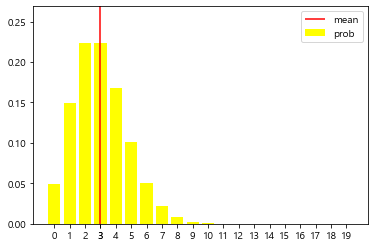

In [119]:
plot_prob(X)

- 하루평균 3건이 발생하는 곳이라 3건이 발생하는 부분에 많이 분포해있다

- 과제_0826_5
  - p.167-169 문제풀기

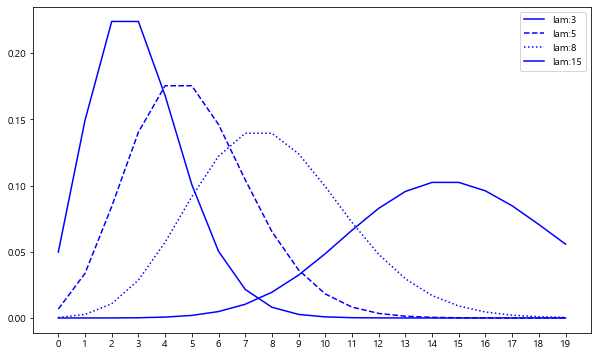

In [124]:
# 파라미터 변경 => 평균 n건이 발생하는 곳으로 변경
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(1,1,1)

# 19건까지만 제한, 평균 건수 3, 5, 8로 변경
x_set = np.arange(20)
for lam, ls in zip([3,5,8, 15], linestyles):
    #scipy.stats 내장함수 poisson => 포아송 분포 함수
    #pmf => Probability Mass Function:  확률 질량 함수
    rv = stats.poisson(lam)
    ax.plot(x_set, rv.pmf(x_set), label=f'lam:{lam}', ls = ls, color='blue')
ax.set_xticks(x_set)
ax.legend()
plt.show()    

- 각 분포의 정상에 각 지정한 파라미터가 존재(3, 5, 8)
- 파라미터 값이 커질 수록 경사가 완만해짐

- 과제_0826_6
  - 베르누이, 이항분포, 기아분포, 포아송분포의 사례를 생성하여 각각의 경우에 대한 기댓값과 분산을 산출하기

In [186]:
# 기댓값과 분산 리턴
linestyles = ['-', '--', ':', '-.', '-']

def E(X, g=lambda x: x):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

def V(X, g=lambda x: x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k)-mean)**2 * f(x_k) for x_k in x_set])

def check_prob(X): # 확률변수를 인수로 가지며 기댓값과 분산 계산 결과를 반환
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    # assert 조건, '에러메세지' => 조건을 만족하면 그대로 진행, 아니면 오류메세지 뜨기
    assert np.all(prob >= 0), 'minus probability'
    prob_sum = np.round(np.sum(prob), 6)
    assert prob_sum == 1, f'sum of probability{prob_sum}'
    print(f'평균 {E(X):.4}')
    print(f'분산 {(V(X)):.4}')
    
# 그래프그리는 함수
def plot_prob(X): # 확률변수를 인수로 가지며 그 확률변수의 확률함수와 기댓값을 그리기 위한 함수
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    
    fig = plt.figure(figsize=(6, 4))
    ax = fig.add_subplot(111)
    ax.bar(x_set, prob, label='prob', color='yellow')
    # 평균 선 그리기(0과 1사이)
    ax.vlines(E(X), 0, 1, label='mean', color="red")
    ax.set_xticks(np.append(x_set, E(X)))
    ax.set_ylim(0, prob.max()*1.2)
    ax.legend()
    
    plt.show()

In [187]:
# 로또 1등에 당첨 => 1, 아니면 0
rotto_price

,상금,p
등수,,
1,1000,0.1
2,200,0.2
3,50,0.3
4,0,0.4


In [188]:
# 베르누이분포

def Bern(p):
    x_set = np.array([0, 1])
    def f(x):
        if x in x_set:
            return p**(x)*(1-p)**(1-x)
        else:
            return 0
    return x_set, f

# 이항분포 (10번 시행 했을 때 1등이 n번 될 확률)

def Bin(n, p):
    x_set = np.arange(n+1)
    def f(x):
        if x in x_set:
            return comb(n, x)*p**(x)*(1-p)**(n-x)
        else:
            return 0
    return x_set, f

# 기하분포(처음 성공이 나올 때까지 반복한 횟수)

def Ge(p):
    x_set = np.arange(1, 20)
    def f(x):
        if x in x_set:
            return p*(1-p)**(x-1)
        else:
            return 0
    return x_set, f

# 포아송분포(평균 p번 발생하는 사건이 어떤 시간에 발생하는 건수의 분포)

def Poi(n):
    x_set = np.arange(20)
    def f(x):
        if x in x_set:
            return np.power(n, x)/factorial(x)*np.exp(-n)
        else:
            return 0
    return x_set, f

In [200]:
# 베르누이 분포
X = Bern(0.1)
print("====베르누이 분포====")
check_prob(X)

#이항분포
n = 10
p = 0.1
X1 = Bin(n, p)
print('\n', "====이항분포====")
check_prob(X1)

# 기하분포
p = 0.3
X2 = Ge(p)
# print('\n', "====기하분포====")
# check_prob(X2)

# 포아송 분포 (한달에 1번 1등이 나오는 곳의 한달에 당첨 건수)
p1= 1
X3 = Poi(p1)
print('\n', "====포아송분포====")
check_prob(X3)

====베르누이 분포====
평균 0.1
분산 0.09

 ====이항분포====
평균 1.0
분산 0.9

 ====포아송분포====
평균 1.0
분산 1.0


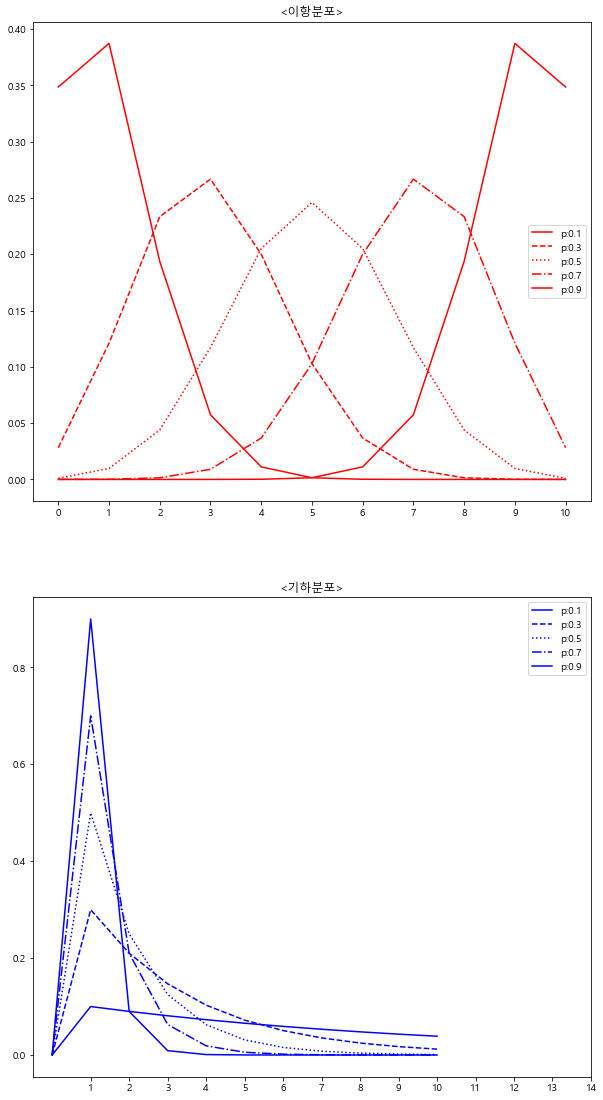

In [190]:
# 이항분포 p 변경

fig = plt.figure(figsize=(10,30))

ax1 = fig.add_subplot(311)

x_set = np.arange(n+1)
for p, ls in zip([0.1, 0.3, 0.5, 0.7, 0.9], linestyles):
    rv = stats.binom(n, p)
    ax1.plot(x_set, rv.pmf(x_set), label = f'p:{p}', ls=ls, color = 'red')
ax1.set_title('<이항분포>')
ax1.set_xticks(x_set)
ax1.legend()

# 기하분포 p 변경

ax2 = fig.add_subplot(312)

x_set1 = np.arange(1, 15)
for p, ls in zip([0.1, 0.3, 0.5, 0.7, 0.9], linestyles):
    rv = stats.geom(p)
    ax2.plot(x_set, rv.pmf(x_set), label = f'p:{p}', ls=ls, color = 'blue')
ax2.set_title('<기하분포>')
ax2.set_xticks(x_set1)
ax2.legend()

# 포아송분포 p 변경
